<a href="https://colab.research.google.com/github/campusplage/compte-rendus-mullier_alberjaoui/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Mickail Alberjaoui
## Gaël Mullier

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
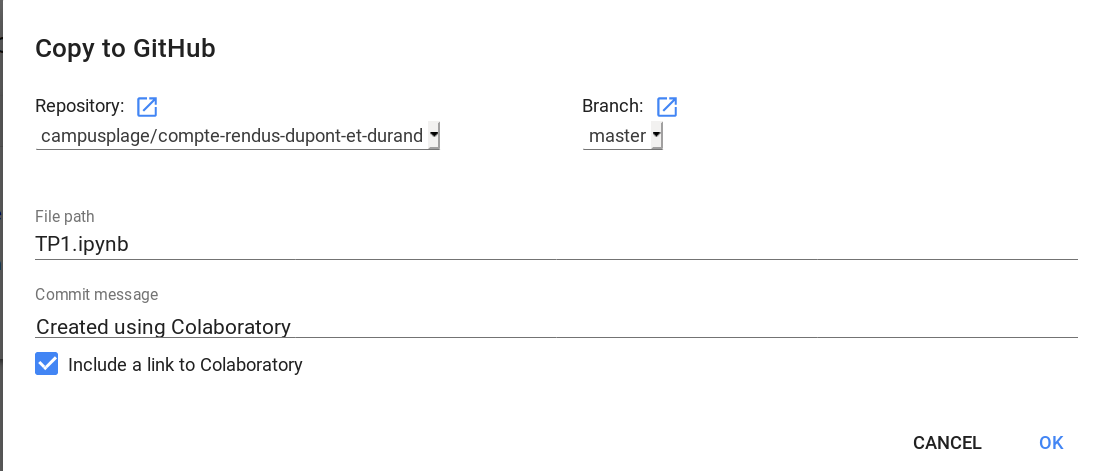

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [1]:
# on importe le package pandas
import pandas
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')
raw_data = raw_data.rename(columns={raw_data.columns[0]: 'Ville'})
raw_data = raw_data.set_index('Ville')
raw_data.head()


# on stock le tableau csv depuis le lien donné ci dessus dans la variable raw_data, on ajoute un encoding speciale car il y a des accents
# puis on affiche les premiere tête de liste pour verifier si cela a bien marché

# VOTRE TRAVAIL ICI


,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [2]:
# on crée une liste appellé 'months" contenant les mois de l'années
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
#  on crée une liste de deux elements contenant precipitation et jour de pluie
types = ['Précipitations', 'Jours de pluie']

# on utilise la fonction MultiIndex pour attribuer à la variable index une 
# indexation à plusieurs niveaux, sur les colonnes on attribue l'index "mois" à
# liste "months" et l'index grandeur à la liste type 
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

#  on concatène deux listes d'entier, la première allant de 0 à 11 et la deuxième
# de 13 à 24 ce qui nous donne une liste d'entiers allant de 0 à 24 sans le 
# chiffre 12 
nested_columns = list(range(12)) + list(range(13, 25))

# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)

# on defini l'index de notre dataframe par le multi index qu'on a crée
# ci-dessus:
data = data.set_index(raw_data.index)

# on crée une liste "other colums" pour fluidifier le code, puis
# on ajoute à data les colonne qu'il nous manque et en meme temps
# on les remplie depuis les valeurs de raw_data 
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
data.head()

Grandeur  Précipitations                ... Latitude Longitude Géographie
Mois             Janvier Février  Mars  ...                              
Ville                                   ...                              
Ajaccio             78.0    69.0  51.0  ...    41.55      8.44        Sud
Angers              65.0    50.0  60.0  ...    47.28     -0.33      Ouest
Angoulème           79.0    68.0  64.0  ...    45.39      0.09      Ouest
Besançon            94.0    87.0  75.0  ...    47.15      6.02        Est
Biarritz           128.0   105.0  98.0  ...    43.29     -1.34      Ouest

[5 rows x 30 columns]

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [3]:
# Affichez seulement les précipitations mensuelles de toutes les villes
data['Précipitations'].head()

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0


In [4]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août"
data.iloc[:,17:20].head()
#on utilise .head() pour pas saturer l'affichage de la page

Grandeur  Jours de pluie              
Mois                Juin Juillet  Août
Ville                                 
Ajaccio              4.0     1.0   2.0
Angers              10.0    11.0  11.0
Angoulème           11.0    12.0  12.0
Besançon            14.0    14.0  13.0
Biarritz            14.0    13.0  13.0

In [5]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème.
# (utilisez `loc` et le formattage de chaines de caractère avec print)
print("La latitude d'Angoulème est " , data.loc['Angoulème','Latitude'][0],
      "\nLa longitude d'Angoulème est " , data.loc['Angoulème','Longitude'][0])

La latitude d'Angoulème est  45.39 
La longitude d'Angoulème est  0.09


> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [0]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique
data['Jours de pluie']['Montpellier':'Paris']

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Montpellier,8.0,6.0,8.0,8.0,9.0,5.0,3.0,6.0,7.0,9.0,9.0,10.0
Nancy,16.0,13.0,12.0,13.0,13.0,13.0,12.0,13.0,12.0,13.0,15.0,16.0
Nantes,18.0,14.0,14.0,11.0,13.0,11.0,12.0,12.0,14.0,15.0,16.0,18.0
Nice,9.0,7.0,8.0,9.0,8.0,5.0,2.0,4.0,7.0,9.0,9.0,9.0
Nîmes,8.0,6.0,9.0,8.0,9.0,6.0,4.0,6.0,7.0,9.0,10.0,10.0
Orléans,16.0,13.0,12.0,12.0,13.0,11.0,11.0,12.0,12.0,13.0,15.0,16.0
Paris,17.0,14.0,12.0,13.0,12.0,12.0,12.0,13.0,13.0,13.0,15.0,16.0


In [6]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 
pandas.concat([data['Précipitations'],data['Géographie']], axis=1, sort=True).head()

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Géographie
Ville,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,Ouest


In [0]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes
data.iloc[:15,27:].head()

Grandeur,Latitude,Longitude,Géographie
Mois,,,
Ville,,,
Ajaccio,41.55,8.44,Sud
Angers,47.28,-0.33,Ouest
Angoulème,45.39,0.09,Ouest
Besançon,47.15,6.02,Est
Biarritz,43.29,-1.34,Ouest


# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [0]:
grouped_data = data.groupby(axis=1, level='Grandeur')

En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [0]:
# par une petite boucle sur les différents groupes créés, on peut en afficher le nom
for group in grouped_data.groups:
  print(group)

Amplitude annuelle des températures
Géographie
Insolation annuelle
Jours de pluie
Latitude
Longitude
Précipitations
Température moyenne annuelle


Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [0]:
##
# AIDE
##
data.loc[:,(['Grandeur'])]
data.loc[:,(['Précipitations','Jour de pluie'],['Janvier','Février'])]

In [0]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles.
groupby_prec_jpluie=grouped_data.sum()[['Jours de pluie','Précipitations']]
groupby_prec_jpluie.head()

Grandeur,Précipitations,Jours de pluie
Ville,,
Ajaccio,653.0,95.0
Angers,690.0,154.0
Angoulème,826.0,160.0
Besançon,1088.0,169.0
Biarritz,1474.0,177.0


In [0]:
# Comparer avec les colonnes correspondantes de `raw_data`. 
# vous pouvez utiliser `to_numpy` et l'opérateur de comparaison `==`
bool_prec = raw_data['Précipitations annuelles'].to_numpy().sum()==groupby_prec_jpluie['Précipitations'].sum()
bool_nbAn = raw_data['Nombre annuel de jours de pluie'].to_numpy().sum()==groupby_prec_jpluie['Jours de pluie'].sum()
print("Précipitations:", bool_prec, " et Nb annuel de jours de pluie: ", bool_nbAn)

Précipitations: True  et Nb annuel de jours de pluie:  True



Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [0]:
# cumul des précipitations et du nombre de jours de pluie de mai à août
data.loc[:,(['Précipitations','Jours de pluie'], ['Mai', 'Juin', 'Juillet', 'Août'])].groupby(axis=1, level='Grandeur').sum().head()

Grandeur,Jours de pluie,Précipitations
Ville,,
Ajaccio,15.0,91.0
Angers,45.0,200.0
Angoulème,49.0,247.0
Besançon,55.0,389.0
Biarritz,57.0,383.0


## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [0]:
# premier pivot des données avec melt

#Création d'un pivot avec 'Précipitations' et 'Jours de pluie'
pivot_1 = data.reset_index().melt(
    id_vars='Ville', var_name=['Grandeur', 'Mois'], 
    value_vars= ['Précipitations', 'Jours de pluie'], value_name='Valeur')
pivot_1.head()
#months = data['Précipitations'].columns[:12].tolist()
#months
#data.reset_index().melt(id_vars='Ville',value_vars=data.columns.tolist())

,Ville,Grandeur,Mois,Valeur
0,Ajaccio,Précipitations,Janvier,78.0
1,Angers,Précipitations,Janvier,65.0
2,Angoulème,Précipitations,Janvier,79.0
3,Besançon,Précipitations,Janvier,94.0
4,Biarritz,Précipitations,Janvier,128.0


À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [0]:
# deuxième pivot

# On met cette fois-ci en id_vars la 'Géographie'
pivot_2 = data.reset_index().melt(
    id_vars=['Ville','Géographie'], var_name=['Grandeur', 'Mois'], 
    value_vars= ['Précipitations', 'Jours de pluie'], value_name='Valeur')
pivot_2.head()

,Ville,Géographie,Grandeur,Mois,Valeur
0,Ajaccio,Sud,Précipitations,Janvier,78.0
1,Angers,Ouest,Précipitations,Janvier,65.0
2,Angoulème,Ouest,Précipitations,Janvier,79.0
3,Besançon,Est,Précipitations,Janvier,94.0
4,Biarritz,Ouest,Précipitations,Janvier,128.0


Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [0]:
# précipitations mensuelles moyennes
aggregated = pivot_2.pivot_table(values="Valeur", index=['Géographie', 'Mois'], aggfunc = 'mean')
aggregated.head()

Valeur
Géographie Mois               
Est        Août      49.000000
           Avril     32.777778
           Décembre  38.555556
           Février   33.222222
           Janvier   37.000000

# 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
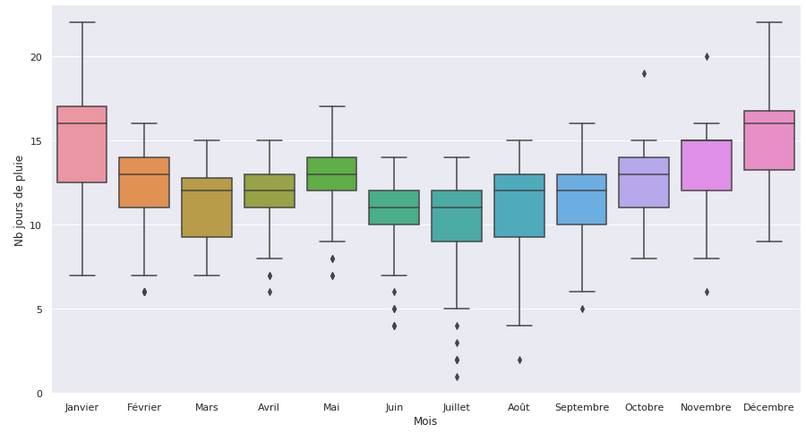

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

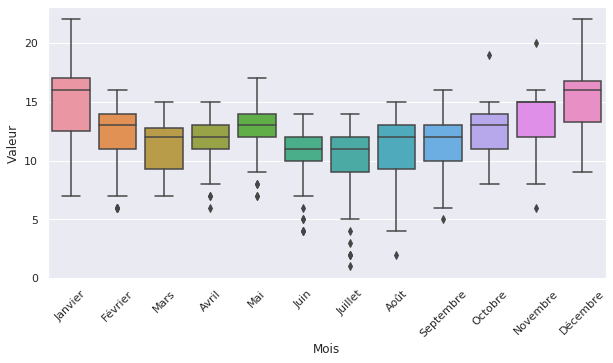

In [0]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
sns.set()

# VOTRE CODE ICI
# Affichage du boxplot avec la fonction boxplotavec les valeurs 'Mois' et 'Valeur' 
# du tableau data_pivot pour lesquelles la grandeur est 'Jours de pluie'
g = sns.boxplot(x='Mois', y='Valeur', 
                  data=pivot_2[pivot_2.Grandeur == 'Jours de pluie']);

# on tourne les labels pour que ça soit plus joli
for item in g.get_xticklabels():
    item.set_rotation(45)
# on agrandit la figure
g.get_figure().set_size_inches(10,5)

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

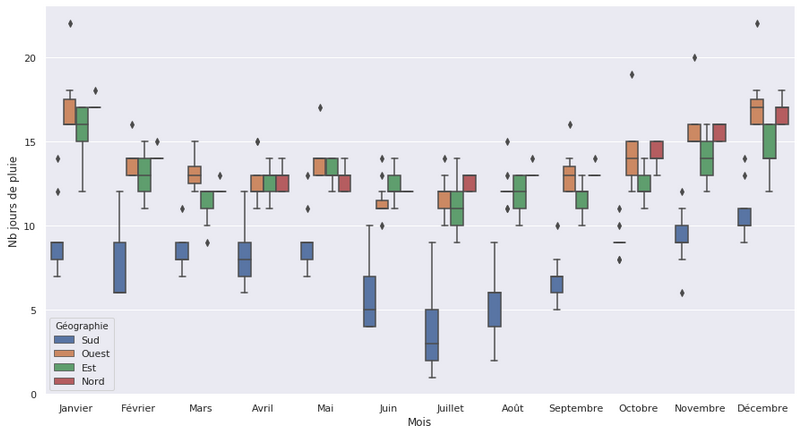

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

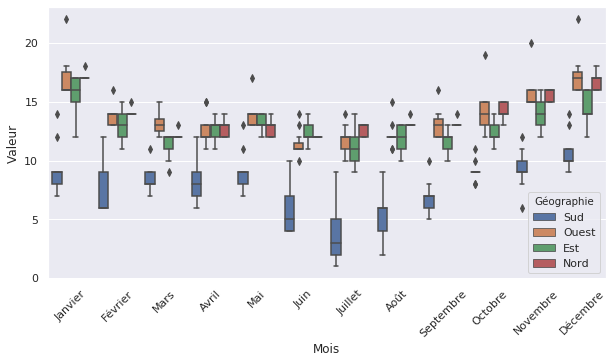

In [0]:
## boxplot par différentes zones géographiques....

# Ajout de la couleur selon la 'Géographie'
g = sns.boxplot(x='Mois', y='Valeur', 
                data=pivot_2[pivot_2.Grandeur == 'Jours de pluie'], 
                hue='Géographie');

# on tourne les labels pour que ça soit plus joli
for item in g.get_xticklabels():
    item.set_rotation(45)
# on agrandit la figure
g.get_figure().set_size_inches(10,5)

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


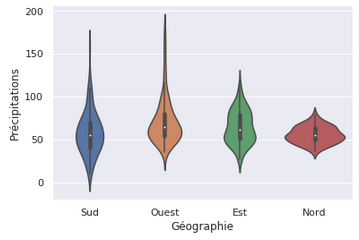

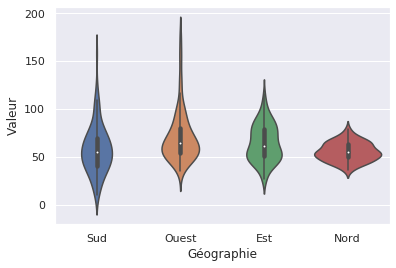

In [0]:
# Affichage de la distribution marginale des précipitations par zone géographique
# Création d'un violinplot
g = sns.violinplot(data=pivot_2[pivot_2.Grandeur == 'Précipitations'], x='Géographie', y='Valeur')

## b. Affichages extras (points bonus)

> Cette section est à faire tout à la fin, quand vous aurez traité l'ensemble des TPs de ce cours.

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

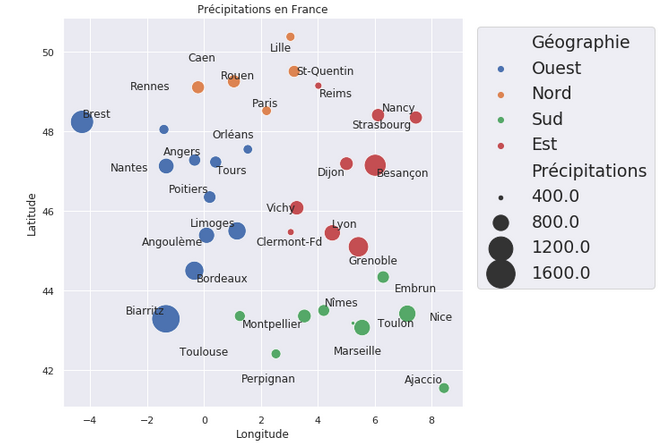

In [7]:
import matplotlib.pyplot as plt

# Pour gérer l'écart des morceaux du pie.
liste=[]
for i in range(34):
  a=(1/51)*i
  
  liste.append(a)
print(liste)

[0.0, 0.0196078431372549, 0.0392156862745098, 0.058823529411764705, 0.0784313725490196, 0.09803921568627451, 0.11764705882352941, 0.13725490196078433, 0.1568627450980392, 0.1764705882352941, 0.19607843137254902, 0.21568627450980393, 0.23529411764705882, 0.2549019607843137, 0.27450980392156865, 0.29411764705882354, 0.3137254901960784, 0.3333333333333333, 0.3529411764705882, 0.37254901960784315, 0.39215686274509803, 0.4117647058823529, 0.43137254901960786, 0.45098039215686275, 0.47058823529411764, 0.49019607843137253, 0.5098039215686274, 0.5294117647058824, 0.5490196078431373, 0.5686274509803921, 0.5882352941176471, 0.6078431372549019, 0.6274509803921569, 0.6470588235294118]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


([<matplotlib.patches.Wedge at 0x7f25a2cc2f98>,
 [Text(1.0977366407169895, 0.07052848805538944, 'Marseille'),
  Text(1.0979401418976125, 0.21920120260688908, 'Clermont-Fd'),
  Text(1.075883840939681, 0.374548182025734, 'Reims'),
  Text(1.0289943349022819, 0.5329565001548909, 'Lille'),
  Text(0.9547532028820348, 0.6907581497125189, 'Orléans'),
  Text(0.8549067673182932, 0.8393047012352366, 'Paris'),
  Text(0.7308548686892299, 0.9739176149833417, 'Perpignan'),
  Text(0.5841817193219921, 1.090656413008236, 'Rennes'),
  Text(0.4153703678768256, 1.1862425626764745, 'Ajaccio'),
  Text(0.22757262145028115, 1.2560206465643806, 'Toulouse'),
  Text(0.023869244299845032, 1.2958586186176646, 'Nîmes'),
  Text(-0.19111736534385565, 1.3017313569233517, 'St-Quentin'),
  Text(-0.40837657814437234, 1.2713138680302087, 'Tours'),
  Text(-0.6215417314465659, 1.2039290674319576, 'Angers'),
  Text(-0.8248746945516384, 1.099481213738939, 'Embrun'),
  Text(-1.0118366559158196, 0.9590362848119574, 'Poitiers'),


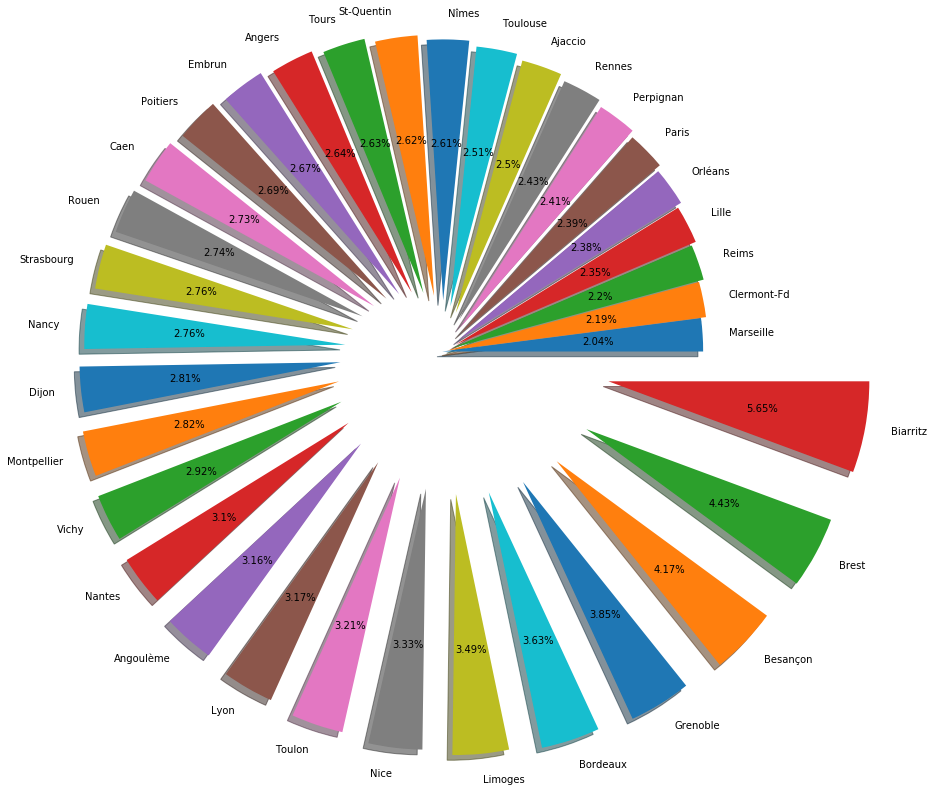

In [8]:
import matplotlib.pyplot as plt


# Voila un graphique que je trouve assez utile. 
# Il peut être beau mais est surtout original! 
# On l'a nommé le "graphique escargot".

plt.figure(figsize=(12,12)) 

b=data.T.iloc[:12,:].mean()

d=pandas.DataFrame(b)
d.columns = ['test']
e=d.sort_values(by='test') 


plt.pie(e,labels=e.index,shadow=True,autopct = lambda x: str(round(x,2))+'%',explode=liste)